LSTM model that will try to predict downward and upward trends of the Google stock price. We are going to train our model on the  5 year Google stock price (from beginning of 2012 to the end of 2016). We will try to predict the January 2017 stock price upward/downward trends.

### 1) Data preprocessing  
### 2) Building the RNN
### 3) Making the predictions and visualizing the results

# Part 1: Data Preprocessing:

In [1]:
#1.1: IMPORTING THE LIBRARIES
import numpy as np #we will make arrays. they are the only allowed inputs
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#1.2: IMPORT THE TRAINING SET:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
# dataset_train: we only need the second column (open = [1]) to train our dataset.
#.iloc[:, 1:2].values: means all rows and and first column
#1:2: if we just use 1 here, instead of 1:2, we create an array with 1 row. so all the column information is becomes one row. We don't want that
#.values provides us to turn this data frame into a numpy array. without it the output is still a dataframe

In [3]:
# 1.3: FEATURE SCALING:
# we use normalisation scaling technique, instead of standardisation. This is recommended in this type of analysis
# whenever you build an RNN, especially when the sigmoid function is the activation function, use normalisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
#feature range = (0,1) is the default. because all the new/normalized stock prices will be between 0 and 1
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# 1.4: CREATING A DATA STRUCTURE WITH 60 TIMESTEPS AND 1 OUTPUT
# we are going to create a data structure specifying what the RNN will need to remember when predicting the next stock price
#and this is called the number of timesteps. this is super important to have the correct number of timestamps cause it could lead to overfitting
# 60 timesteps mean that at each time t the RNN is going to look at 60 stock prices before time t
# the stock price is between 60 days before time t and time t. 
#based on the trends it's capturing during this 60 days timesteps, it will try to predict the next output
# 60 is the experimented timestep for this prediction
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# X_train is the input 
# y_train is the output
# range(60, 1258): between 60th financial day and 1258 is the last index in our set


In [5]:
# 1.5: RESHAPING:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#input shape: the input should be a 3d array
#adding some more dimensionality. we will add the unit. 
#that is the number of predictors we want
#X_train.shape[0]: batch size= the number of observations. 1198 observations. you can have this in any dataset. because this line gives the number of rows
#X_train.shape[1]: number of timesteps: this is the number of columns
#1: number of indicators= number of predictors


# Part 2: Building the RNN:

In [6]:
# 2.1: IMPORTING KERAS LIBRARIES AND PACKAGES:
from keras.models import Sequential # allow us to create a neural network object representing a sequence of layers
from keras.layers import Dense #to add the output layer 
from keras.layers import LSTM # to add LSTM layer
from keras.layers import Dropout #to add some dropout regularization

In [7]:
# 2.2: INITIALISING THE RNN:
regressor = Sequential()
#since we are predicting a continous value, we are doing some regression. therefore we use the name regressor for our model. 
#classification, on the other hand, is about predicting a category.

In [8]:
# 2.3: ADDING THE FIRST LSTM LAYER AND SOME DROPOUT REGULARIZATION:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
regressor.add(Dropout(0.2))
#arguments:
#units: the number of LSTM cells, or memory units (neurons) you want to have in this LSTM layer. 
# 50 neurons in this layer will get us a model with high dimentiality
# return_sequences: it's true because we are building a stacked LSTM which therefore have several LSTM layers
#return sequences is true because we are adding another LSTM layer = making a stacked LSTM
# once you are done with the LSTM layers, when you are not going to add another one, you will set it to false. false is the default value 
# input_shape: the shape of the input that we created in the last part
#it's an input shape of three dimensions, corresponding to observations(number of rows), the timestep (number of columns) and the indicators.
#we don't have to include all the three dimensions "(X_train.shape[0], X_train.shape[1], 1)" we will just add the last two. 
#because the first one is corresponding to the observations, will be automatically taken into account
# Dropout(0.2): the rate of neurons, you want to ignore in the layers. 0.2 is used generally. 20% dropout

In [9]:
#2.4: ADDING THE SECOND, THIRD AND FOURTH LSTM LAYERS AND DROPOUTS:

# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# we only specify the shape of the input in the first layer

# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [10]:
# 2.5: ADDING THE OUTPUT LAYER:
regressor.add(Dense(units = 1))
# to make a full connection with the last lstm layer and the output, we use the dense class
#unit =1 the number of neurons that needs to be in the output
#since we're predicting a real value corresponding to the stock price, the output has only one dimension (neuron).


In [11]:
#2.6: COMPILING THE RNN WITH THE OPTIMIZER AND THE LOSS:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#compile is a method of sequential class
#mean_squared_error is good for regression

In [12]:
#2.7 FITTING THE RNN TO THE TRAINING SET:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
#we will update the stock prices in every 32 stock prices

Epoch 1/100
38/38 [==============================] - 23s 166ms/step - loss: 0.0412
Epoch 2/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 7s 171ms/step - loss: 0.0040
Epoch 10/100
38/38 [==============================] - 7s 171ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0040
Epoch 13/100

# Part 3: Making the predictions and visualizing the results

In [13]:
# 3.1: Getting the real stock price of January 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
#we already know the stock prices for january 2017, but the model is not trained on this.

# 3.2: Getting the predicted stock price of 2017
#this is the predicted results for january 2017
#1. key point:
#we trained our model to be able to predict the stock prices according to previous 60 days
#and therefore, to predict each stock price of each financial day of Jan 2017, we will need the 60 previous stock prices, before the actual day.

#2. key point: 
#in order to get each day of jan 2017 the 60 previous stock prices, we will need both the training and test data
#because we will have some of the 60 days from the training set, becuase they will be from Dec 2016 and we will also have some from the jan
#therefore, we need concatinate the training and the test set.

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
# concat function: we united the two sets by rows (axis =0). we only have the 'open' column
# inputs: the stock prices of the 60 previous stock prices (equal to 3 months of financial day)
# len(dataset_total) - len(dataset_test) - 60: this is the lower bound
# upper bound is the last index
# inputs.reshape: this will get the inputs in one column
# sc.transform(inputs): scaling the inputs

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#our test set only has 20 financial days (equals to 1 month=jan), therefore the upper bound is 80

In [16]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [17]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [18]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

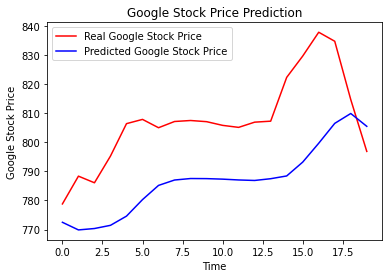

In [14]:
#3.3 Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [15]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

23.26571557023658